# Project: Wrangling and Analyze Data

In [1]:
#importing relevant libraries
import pandas as pd
import numpy as np
import tweepy
import requests 
import os
import json
import matplotlib.pyplot as plt
%matplotlib inline

## Data Gathering

 -  Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
archive_data = pd.read_csv("twitter-archive-enhanced.csv")


 -  Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
#save to file
with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)
    
#open in a dataframe
img_pred_data = pd.read_csv("image_predictions.tsv", sep="\t")


 -  Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive_data.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [2]:
#Load json data into a dataframe
df_json = pd.read_json('tweet-json.txt', lines=True)
#Extract columns to be used
fav_df =df_json[['id', 'favorite_count', 'retweet_count']].copy()

## Assessing Data



#### Archive Data

In [4]:
#code to view full values of columns

pd.set_option('display.max_colwidth', -1)

In [5]:
#view a random sample of the archive_data
archive_data.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2151,669682095984410625,NaN,NaN,2015-11-26 01:00:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Louie. He just pounded that bottle of wine. 9/10 goodnight Louie https://t.co/RAwZvMKRZB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669682095984410625/photo/1,9,10,Louie,None,None,None,None
248,845397057150107648,NaN,NaN,2017-03-24 22:08:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Say hello to Mimosa. She's an emotional support doggo who helps her owner with PTSD. 13/10, but she needs your help\n\nhttps://t.co/L6mLzrd7Mx https://t.co/jMutBFdw5o",NaN,NaN,NaN,"https://www.gofundme.com/help-save-a-pup,https://twitter.com/dog_rates/status/845397057150107648/photo/1,https://twitter.com/dog_rates/status/845397057150107648/photo/1",13,10,Mimosa,doggo,None,None,None
83,876537666061221889,NaN,NaN,2017-06-18 20:30:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I can say with the pupmost confidence that the doggos who assisted with this search are heroic as h*ck. 14/10 for all https://t.co/8yoc1CNTsu,NaN,NaN,NaN,https://twitter.com/mpstowerham/status/876162994446753793,14,10,None,None,None,None,None
1180,719339463458033665,NaN,NaN,2016-04-11 01:41:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Lucy and Sophie. They think they're the same size. Both 10/10 would snug at same time https://t.co/HW50zkcf2R,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719339463458033665/photo/1,10,10,Lucy,None,None,None,None
1786,677573743309385728,NaN,NaN,2015-12-17 19:39:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sandy. He's sexually confused. Thinks he's a pigeon. Also an All-American cheese catcher. 10/10 so petable https://t.co/Htu8plSqEu,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/677573743309385728/photo/1,https://twitter.com/dog_rates/status/677573743309385728/photo/1",10,10,Sandy,None,None,None,None
2224,668291999406125056,NaN,NaN,2015-11-22 04:56:43 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I can't do better than he did. 10/10 https://t.co/fM0KXns7Or,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668291999406125056/photo/1,10,10,None,None,None,None,None
1856,675522403582218240,NaN,NaN,2015-12-12 03:47:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sammy. He's a Motorola Firefox. Hat under hoodie (must be a half-decent up and coming white rapper) 10/10 https://t.co/rO2zxf0OQ0,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675522403582218240/photo/1,10,10,Sammy,None,None,None,None
669,790227638568808452,NaN,NaN,2016-10-23 16:25:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Leela. She's a Fetty Woof. Lost eye while saving a baby from an avalanche. 11/10 true h*ckin hero https://t.co/2lBg3…,7.626999e+17,4.196984e+09,2016-08-08 17:19:51 +0000,https://twitter.com/dog_rates/status/762699858130116608/photo/1,11,10,Leela,None,None,None,None
235,847606175596138505,NaN,NaN,2017-03-31 00:27:14 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cannon. He just heard something behind him. Fr*ckin frightened af. 12/10 don't look back just run https://t.co/WTPBWT6Ux1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/847606175596138505/photo/1,12,10,Cannon,None,None,None,None
202,853639147608842240,NaN,NaN,2017-04-16 16:00:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</

In [7]:
#View general information about the dataframe
archive_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
#View statistical summary of the dataframe
archive_data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
#check the unique values in the name column and arrange alphabetically
sorted(list(archive_data.name.unique()))

['Abby',
 'Ace',
 'Acro',
 'Adele',
 'Aiden',
 'Aja',
 'Akumi',
 'Al',
 'Albert',
 'Albus',
 'Aldrick',
 'Alejandro',
 'Alexander',
 'Alexanderson',
 'Alf',
 'Alfie',
 'Alfy',
 'Alice',
 'Amber',
 'Ambrose',
 'Amy',
 'Amélie',
 'Anakin',
 'Andru',
 'Andy',
 'Angel',
 'Anna',
 'Anthony',
 'Antony',
 'Apollo',
 'Aqua',
 'Archie',
 'Arlen',
 'Arlo',
 'Arnie',
 'Arnold',
 'Arya',
 'Ash',
 'Asher',
 'Ashleigh',
 'Aspen',
 'Astrid',
 'Atlas',
 'Atticus',
 'Aubie',
 'Augie',
 'Autumn',
 'Ava',
 'Axel',
 'Bailey',
 'Baloo',
 'Balto',
 'Banditt',
 'Banjo',
 'Barclay',
 'Barney',
 'Baron',
 'Barry',
 'Batdog',
 'Bauer',
 'Baxter',
 'Bayley',
 'BeBe',
 'Bear',
 'Beau',
 'Beckham',
 'Beebop',
 'Beemo',
 'Bell',
 'Bella',
 'Belle',
 'Ben',
 'Benedict',
 'Benji',
 'Benny',
 'Bentley',
 'Berb',
 'Berkeley',
 'Bernie',
 'Bert',
 'Bertson',
 'Betty',
 'Beya',
 'Biden',
 'Bilbo',
 'Billl',
 'Billy',
 'Binky',
 'Birf',
 'Bisquick',
 'Blakely',
 'Blanket',
 'Blipson',
 'Blitz',
 'Bloo',
 'Bloop',
 'Blu',


In [11]:
#view dogs that belong to more than one dog stage
#number of dogs that have values in doggo and floofer columns
len(archive_data[(archive_data.doggo != "None") & (archive_data.floofer != "None")])

1

In [12]:
#number of dogs that have values in both doggo and pupper columns
len(archive_data[(archive_data.doggo != "None") & (archive_data.pupper != "None")])

12

In [13]:
#number of dogs with values in both doggo and puppo columns
len(archive_data[(archive_data.doggo != "None") & (archive_data.floofer != "None")])

1

In [14]:
#number of dogs with values in both floofer and pupper columns
len(archive_data[(archive_data.floofer != "None") & (archive_data.pupper != "None")])

0

In [15]:
#number of dogs with values in both floofer and puppo columns
len(archive_data[(archive_data.floofer != "None") & (archive_data.puppo != "None")])

0

In [16]:
#number of dogs with values in both pupper and puppo columns
len(archive_data[(archive_data.pupper != "None") & (archive_data.puppo != "None")])

0

#### img_pred_data

In [17]:
img_pred_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
img_pred_data.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1926,857746408056729600,https://pbs.twimg.com/media/C-dTzBzXUAQRjYz.jpg,1,Labrador_retriever,0.919832,True,beagle,0.043513,True,golden_retriever,0.023359,True
1173,737310737551491075,https://pbs.twimg.com/ext_tw_video_thumb/737310236135043073/pu/img/_lG4DXmH-_XEq7Rc.jpg,1,cliff,0.439077,False,lakeside,0.062899,False,valley,0.039759,False
880,698635131305795584,https://pbs.twimg.com/ext_tw_video_thumb/698635005506015234/pu/img/wQ4yFXTZ-2QLt68b.jpg,1,Samoyed,0.158464,True,kuvasz,0.089402,True,West_Highland_white_terrier,0.025037,True
282,671134062904504320,https://pbs.twimg.com/media/CVBY3e7XIAAAE4Y.jpg,1,Shih-Tzu,0.180380,True,golden_retriever,0.180194,True,Labrador_retriever,0.173656,True
714,685532292383666176,https://pbs.twimg.com/media/CYN_-6iW8AQhPu2.jpg,1,white_wolf,0.318524,False,dingo,0.215436,False,collie,0.095805,True


#### fav_df

In [22]:
fav_df.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [23]:
fav_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


### Quality issues
#### archive_data
 - Data type for timestamp is object instead of datetime
 - Data types for IDs are integers instead of strings
 - "None" in some columns instead of NaN
 - Some dog names aren't actually names(a, such...) beginning with lower case letters
 - Some rows are retweets, original ratings are required 
 - Some dogs belong to more than one dog stage
 - Inconsistent rating scale
 - Unusually large rating_numerator for some dogs
 - source column has "a" tag
 
#### img_pred_data
 - Inconsistent capitalization in p1, p2, p3 columns
 - Data type for tweet_id is integer instead of string
 
#### fav_df
 - id column should be tweet_id
 - Data type for id is integer instead of string

### Tidiness issues
 - Dog stages in archive_data are in 4 different columns

 - fav_df and img_pred_data should be in  archive_data
 - Text column contains short url

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [25]:
# Make copies of original pieces of data
archive_data_clean = archive_data.copy()
img_pred_data_clean = img_pred_data.copy()
fav_df_clean = fav_df.copy()

### archive_data

### Issue #1: Data type for timestamp is object instead of datetime

#### Define: The datatype of timestamp column should be datetime, convert with to_datetime

#### Code

In [26]:
archive_data_clean.timestamp = pd.to_datetime(archive_data_clean.timestamp).dt.date
#Extract only the date
archive_data_clean.timestamp = pd.to_datetime(archive_data_clean.timestamp)


#### Test

In [27]:
#check with .info()
archive_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

The timestamp column is now has the correct data type

### Issue #2: Data types for tweet_id is integer instead of string

#### Define
The datatype for the tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_user_id should be strings. Convert using astype

#### Code

In [28]:
archive_data_clean.tweet_id = archive_data_clean.tweet_id.astype(str)

#### Test

In [29]:
#check with .info()
archive_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

All the ids are now strings

### Issue #3: "None"  in some columns instead of NaN

#### Define
name, doggo, floofer, puppo, pupper columns have missing values represented with "None", it will be easier to work with Nan. Replace "None" with Nan


#### Code

In [30]:
#Replace " None " with Nan
to_replace_list = ["name", "doggo", "floofer", "pupper", "puppo"]
for col in to_replace_list:
    archive_data_clean[col] = archive_data_clean[col].replace({"None": np.nan})


#### Test

In [31]:
archive_data_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1700,680959110691590145,NaN,NaN,2015-12-27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ozzie. He was doing fine until he lost traction in those festive socks. Now he's tired. 9/10 still killin it https://t.co/u4FYdIRKnY,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/680959110691590145/photo/1,https://twitter.com/dog_rates/status/680959110691590145/photo/1,https://twitter.com/dog_rates/status/680959110691590145/photo/1",9,10,Ozzie,NaN,NaN,NaN,NaN
1568,687818504314159109,NaN,NaN,2016-01-15,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",With great pupper comes great responsibility. 12/10 https://t.co/hK6xB042EP,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687818504314159109/photo/1,12,10,NaN,NaN,NaN,pupper,NaN
1351,704054845121142784,NaN,NaN,2016-02-28,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845121142784/photo/1,60,50,a,NaN,NaN,NaN,NaN
1250,711008018775851008,NaN,NaN,2016-03-19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Chuckles. He had a balloon but he accidentally let go of it and it floated away. 11/10 hang in there pupper https://t.co/68iNM7B5gW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/711008018775851008/photo/1,11,10,Chuckles,NaN,NaN,pupper,NaN
626,795076730285391872,NaN,NaN,2016-11-06,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bailey. She loves going down slides but is very bad at it. Still 11/10 https://t.co/ivPWhspN3E,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/795076730285391872/photo/1,https://twitter.com/dog_rates/status/795076730285391872/photo/1,https://twitter.com/dog_rates/status/795076730285391872/photo/1",11,10,Bailey,NaN,NaN,NaN,NaN


### Issue #4: Some dog names aren't actually names(a, such...) beginning with lower case letters

 #### Define
 Some names were wrongly filled, replace such entries with Nan

#### Code

In [32]:
#Get list of wrong names and replace each value with Nan
wrong_name_list = ['a', 'actually', 'all', 'an', 'by', 'getting', 'his', 'incredibly', 'infuriating', 
                    'just', 'life', 'light', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space',
                    'such', 'the', 'this', 'unacceptable', 'very']
for n in wrong_name_list:
    archive_data_clean.name = archive_data_clean.name.replace({n: np.nan})

###  Test

In [33]:
archive_data_clean[archive_data_clean.name.isin(wrong_name_list)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [34]:
#Check if there are any other names starting with lowercase using regex
archive_data_clean['name'].str.contains('^[a-z]+').sum()

0

### Issue #5: Some rows are retweets , original ratings are required 
#### Define
Some rows in the dataframe are retweets , as per the instructions, only original tweets are required. Drop all retweets and replies

#### Code

In [35]:
#get tweet_id of retweets
rt_id_list = archive_data_clean[archive_data_clean.retweeted_status_id.notnull()]["tweet_id"].tolist()
#Drop the rows
archive_data_clean.drop(archive_data_clean.index[archive_data_clean["tweet_id"].isin(rt_id_list)], inplace=True)

Information about retweets are no longer needed, drop them

In [36]:
archive_data_clean.drop(columns=["retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"], axis=1, inplace=True)

#### Test

In [37]:
archive_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1391 non-null object
doggo                    87 non-null object
floofer                  10 non-null object
pupper                   234 non-null object
puppo                    25 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(9)
memory usage: 254.9+ KB


### Issue #6: Some dogs belong to more than one dog stage

#### Define
1 dog belongs to doggo and floofer, 12 dogs belong to doggo and pupper, 1 dog belongs to doggo and puppo.
View the text in each of these to determine the correct stages and replace manually, if the texts are ambigous fill both columns with NaN

#### Code

In [38]:
#dogs that have values in doggo and floofer columns
archive_data_clean[(archive_data_clean.doggo.notna()) & (archive_data_clean.floofer.notna())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk","https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,10,NaN,doggo,floofer,NaN,NaN


The row with index 200 is actually not a dog, drop

In [39]:
archive_data_clean.drop(archive_data_clean.index[archive_data_clean["tweet_id"] == "854010172552949760"], inplace=True)

In [40]:
#dogs that have values in both doggo and pupper columns
archive_data_clean[(archive_data_clean.doggo.notna()) & (archive_data_clean.pupper.notna())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,NaN,NaN,2017-01-07,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,doggo,NaN,pupper,NaN
531,808106460588765185,NaN,NaN,2016-12-12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,NaN,doggo,NaN,pupper,NaN
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,NaN,doggo,NaN,pupper,NaN
575,801115127852503040,NaN,NaN,2016-11-22,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,doggo,NaN,pupper,NaN
705,785639753186217984,NaN,NaN,2016-10-11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,doggo,NaN,pupper,NaN
733,781308096455073793,NaN,NaN,2016-09-29,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",https://vine.co/v/5rgu2Law2ut,12,10,NaN,doggo,NaN,pupper,NaN
889,759793422261743616,NaN,NaN,2016-07-31,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll","https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12,10,Maggie,doggo,NaN,pupper,NaN
956,751583847268179968,NaN,NaN,2016-07-09,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,https://twitter.com/dog_rates/status/751583847268179968/photo/1,5,10,NaN,doggo,NaN,pupper,NaN
1063,741067306818797568,NaN,NaN,2016-06-10,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,https://twitter.com/dog_rates/status/741067306818797568/photo/1,12,10,NaN,doggo,NaN,pupper,NaN
1113,733109485275860992,NaN,NaN,2016-05-19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",https://twitter.com/dog_rates/status/733109485275860992/photo/1,12,10,NaN,doggo,NaN,pupper,NaN


In [41]:
#Index 705 is also not a dog
archive_data_clean.drop(archive_data_clean.index[archive_data_clean["tweet_id"] == "785639753186217984"], inplace=True)

In [42]:
#Dog that belongs to both doggo and puppo
archive_data_clean[(archive_data_clean.doggo.notna()) & (archive_data_clean.puppo.notna())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,NaN,doggo,NaN,NaN,puppo


In [43]:
#Replace pupper column with NaN for dog at indexes 460,575,191 based in the text content
archive_data_clean.loc[460,['pupper']] = np.nan
archive_data_clean.loc[575,['pupper']] = np.nan
archive_data_clean.loc[191,['doggo']] = np.nan

Some rows have more than one rating, because they contain ratings for two dogs in two different stages, both doggo and pupper columns.
Input NaN in all columns since the content of the texts are ambigous

In [44]:

mul_index = archive_data_clean[(archive_data_clean.doggo.notna()) & (archive_data_clean.pupper.notna())]["tweet_id"].index.tolist()
for i in mul_index:
    archive_data_clean.loc[i, ["pupper"]] = np.nan
    archive_data_clean.loc[i, ["doggo"]] = np.nan
    

#### Test


In [45]:
len(archive_data_clean[(archive_data_clean.doggo.notna()) & (archive_data_clean.floofer.notna())])

0

In [46]:

len(archive_data_clean[(archive_data_clean.doggo.notna()) & (archive_data_clean.pupper.notna())])

0

In [47]:
len(archive_data_clean[(archive_data_clean.doggo.notna()) & (archive_data_clean.puppo.notna())])

0

### Issue #7: Inconsistent rating scale
#### Define
The denominators should be 10, some rows have rating_denominators not equal to 10. Convert these denominators appropriately based on the text and use the result to convert the numerators 

#### Code

In [48]:
#check for columns with denominators not equal to 10.
archive_data_clean[archive_data_clean.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,960,0,NaN,NaN,NaN,NaN,NaN
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,11,15,NaN,NaN,NaN,NaN,NaN
433,820690176645140481,NaN,NaN,2017-01-15,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,NaN,NaN,NaN,NaN,NaN
516,810984652412424192,NaN,NaN,2016-12-19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,NaN,NaN,NaN,NaN
902,758467244762497024,NaN,NaN,2016-07-28,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,NaN,NaN,NaN,NaN,NaN
1068,740373189193256964,NaN,NaN,2016-06-08,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,NaN,NaN,NaN,NaN,NaN
1120,731156023742988288,NaN,NaN,2016-05-13,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,NaN,NaN,NaN,NaN,NaN
1165,722974582966214656,NaN,NaN,2016-04-21,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,NaN,NaN,NaN,NaN,NaN
1202,716439118184652801,NaN,NaN,2016-04-03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,NaN,NaN,NaN,NaN
1228,713900603437621249,NaN,NaN,2016-03-27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,NaN,NaN,NaN,NaN,NaN


In [49]:
archive_data_clean.drop(archive_data_clean.index[archive_data_clean["tweet_id"] == "810984652412424192"], inplace=True)

In [50]:
#The tweet at index 342 has insufficient information to determine the rating, it should be dropped
archive_data_clean.drop(archive_data_clean.index[archive_data_clean["tweet_id"] == "832088576586297345"], inplace=True)

In [51]:
def ActualRating(index, numerator, denominator):
    '''This function inputs the correct rating as gotten from the text for the entry on the specified index'''
    archive_data_clean.at[index, ["rating_numerator", "rating_denominator"]] = [numerator,denominator]

In [52]:
#Replace the wrong ratings for some rows with their actual ratings
ActualRating(313, 13, 10)
ActualRating(1068, 14, 10)
ActualRating(1165, 13, 10)
ActualRating(1202, 11, 10)
ActualRating(1662, 10, 10)
ActualRating(2335, 9, 10)


The other rows have ratings multiplied by number of dogs in the image, divide these ratings and multiply by 10 to standardize

In [53]:
multiples = archive_data_clean[archive_data_clean.rating_denominator != 10]["tweet_id"].tolist()
multiples

['820690176645140481',
 '758467244762497024',
 '731156023742988288',
 '713900603437621249',
 '710658690886586372',
 '709198395643068416',
 '704054845121142784',
 '697463031882764288',
 '686035780142297088',
 '684225744407494656',
 '684222868335505415',
 '682808988178739200',
 '677716515794329600',
 '675853064436391936']

In [54]:
for i in multiples:
    row = archive_data_clean[archive_data_clean.tweet_id==i]
    archive_data_clean.loc[archive_data_clean.tweet_id==i, ["rating_numerator"]] = int((row["rating_numerator"]/row["rating_denominator"])*10)
    
    

In [55]:
archive_data_clean[archive_data_clean.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",12,70,NaN,NaN,NaN,NaN,NaN
902,758467244762497024,NaN,NaN,2016-07-28,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,11,150,NaN,NaN,NaN,NaN,NaN
1120,731156023742988288,NaN,NaN,2016-05-13,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,12,170,NaN,NaN,NaN,NaN,NaN
1228,713900603437621249,NaN,NaN,2016-03-27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,https://twitter.com/dog_rates/status/713900603437621249/photo/1,11,90,NaN,NaN,NaN,NaN,NaN
1254,710658690886586372,NaN,NaN,2016-03-18,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,https://twitter.com/dog_rates/status/710658690886586372/photo/1,10,80,NaN,NaN,NaN,NaN,NaN
1274,709198395643068416,NaN,NaN,2016-03-14,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",https://twitter.com/dog_rates/status/709198395643068416/photo/1,9,50,NaN,NaN,NaN,NaN,NaN
1351,704054845121142784,NaN,NaN,2016-02-28,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,https://twitter.com/dog_rates/status/704054845121142784/photo/1,12,50,NaN,NaN,NaN,NaN,NaN
1433,697463031882764288,NaN,NaN,2016-02-10,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,https://twitter.com/dog_rates/status/697463031882764288/photo/1,11,40,NaN,NaN,NaN,NaN,NaN
1598,686035780142297088,6.860340e+17,4.196984e+09,2016-01-10,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating",NaN,2,20,NaN,NaN,NaN,NaN,NaN
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3","https://twitter.com/dog_rates/status/684225744407494656/photo/1,https://twitter.com/dog_rates/status/684225744407494656/photo/1",11,130,NaN,NaN,NaN,NaN,NaN


In [56]:
#Convert the denominators to 10
for i in multiples:
    archive_data_clean.loc[archive_data_clean.tweet_id==i, ["rating_denominator"]] = 10

Also, dogs with multiple ratings have inaccurate dog stages recorded, assign the correct dog stages


In [57]:
archive_data_clean.loc[433, ["floofer"]] = "floofer"
archive_data_clean.loc[1120, ["doggo"]] = "doggo"
archive_data_clean.loc[[1228, 1254,1351,1433,1598,1634,1635,1779,1843], ["pupper"]] = "pupper"


#### Test

In [58]:
archive_data_clean[archive_data_clean.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [59]:
archive_data_clean[archive_data_clean.rating_numerator==420]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,420,10,NaN,NaN,NaN,NaN,NaN
2074,670842764863651840,NaN,NaN,2015-11-29,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420,10,NaN,NaN,NaN,NaN,NaN


In [60]:
#check the stages of the entries with multiple dogs
archive_data_clean.loc[[433,1120,1228,1254,1351,1433,1598,1634,1635,1779,1843]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",12,10,NaN,NaN,floofer,NaN,NaN
1120,731156023742988288,NaN,NaN,2016-05-13,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,12,10,NaN,doggo,NaN,NaN,NaN
1228,713900603437621249,NaN,NaN,2016-03-27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,https://twitter.com/dog_rates/status/713900603437621249/photo/1,11,10,NaN,NaN,NaN,pupper,NaN
1254,710658690886586372,NaN,NaN,2016-03-18,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,https://twitter.com/dog_rates/status/710658690886586372/photo/1,10,10,NaN,NaN,NaN,pupper,NaN
1351,704054845121142784,NaN,NaN,2016-02-28,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,https://twitter.com/dog_rates/status/704054845121142784/photo/1,12,10,NaN,NaN,NaN,pupper,NaN
1433,697463031882764288,NaN,NaN,2016-02-10,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,https://twitter.com/dog_rates/status/697463031882764288/photo/1,11,10,NaN,NaN,NaN,pupper,NaN
1598,686035780142297088,6.860340e+17,4.196984e+09,2016-01-10,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating",NaN,2,10,NaN,NaN,NaN,pupper,NaN
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3","https://twitter.com/dog_rates/status/684225744407494656/photo/1,https://twitter.com/dog_rates/status/684225744407494656/photo/1",11,10,NaN,NaN,NaN,pupper,NaN
1635,684222868335505415,NaN,NaN,2016-01-05,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,https://twitter.com/dog_rates/status/684222868335505415/photo/1,11,10,NaN,NaN,NaN,pupper,NaN
1779,677716515794329600,NaN,NaN,2015-12-18,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,https://twitter.com/dog_rates/status/677716515794329600/photo/1,12,10,NaN,NaN,NaN,pupper,NaN


### Issue #8: Unusually large rating_numerator for some dogs

#### Define
Some dogs have unusually large rating numerators, this can affect the quality of analysis because they are outliers

#### Code

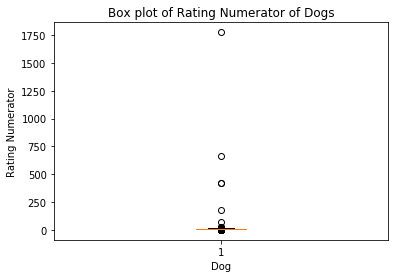

In [61]:
#Use a box plot to check for outliers
#plot a boxplot of the age column to check for outliers
plt.boxplot(archive_data_clean.rating_numerator)
plt.ylabel("Rating Numerator")
plt.xlabel("Dog")
plt.title("Box plot of Rating Numerator of Dogs");

In [62]:
# View dogs with rating_numerator > 20
archive_data_clean[archive_data_clean.rating_numerator > 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,420,10,NaN,NaN,NaN,NaN,NaN
189,855860136149123072,8.558585e+17,13615722.0,2017-04-22,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,666,10,NaN,NaN,NaN,NaN,NaN
290,838150277551247360,8.381455e+17,21955058.0,2017-03-04,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,NaN,182,10,NaN,NaN,NaN,NaN,NaN
695,786709082849828864,NaN,NaN,2016-10-13,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,NaN,NaN,NaN,NaN
763,778027034220126208,NaN,NaN,2016-09-20,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,NaN,NaN,pupper,NaN
979,749981277374128128,NaN,NaN,2016-07-04,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,NaN,NaN,NaN,NaN
1712,680494726643068929,NaN,NaN,2015-12-25,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,NaN,NaN,NaN,NaN,NaN
2074,670842764863651840,NaN,NaN,2015-11-29,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420,10,NaN,NaN,NaN,NaN,NaN


From the dataframe above, it can be noticed that some dogs were wrongly rated; indexes 695, 763,1712, the incorrect ratings should be replaced with ActualRating function. Others have extremely high ratings and should be dropped

In [63]:
#Apply the ActualRating function to input the correct ratings for indexes 695,763 and 1712
ActualRating(695, 10, 10)
ActualRating(763, 11, 10)
ActualRating(1712, 13, 10)

In [64]:
#Drop the remaining rows with extremely high rating_numerator
overrated_list = archive_data_clean[archive_data_clean.rating_numerator > 20].index.tolist()
for rating in overrated_list:
    archive_data_clean.drop(rating, inplace=True)

#### Test

In [65]:
archive_data_clean[archive_data_clean.rating_numerator > 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #8: source column has "a" tag

#### Define
The source column contains irrelevant html tag, only the text between the tags is needed, e.g "Twitter for iPhone". Use regex to extract


#### Code

In [67]:
archive_data_clean.source = archive_data_clean.source.str.extract('>([\w\W\s]+)<', expand=True)


#### Test


In [68]:
archive_data_clean.source.value_counts()

Twitter for iPhone     2034
Vine - Make a Scene    91  
Twitter Web Client     31  
TweetDeck              10  
Name: source, dtype: int64

### Img_pred_data

### Issue #9: Data type for tweet_id is integer instead of string

#### Define
tweet_id is of type int, convert to string

#### Code

In [69]:
img_pred_data_clean.tweet_id = img_pred_data.tweet_id.astype(str)


#### Test

In [70]:
img_pred_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #10: Inconsistent capitailization for p1, p2, p3 colums

In [71]:
img_pred_data_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Define
The dog breeds begin with different cases, convert all to lower case


#### Code

In [72]:
for p in ["p1", "p2", "p3"]:
    img_pred_data_clean[p] = img_pred_data_clean[p].str.lower()

#### Test

In [73]:
for p in ["p1", "p2", "p3"]:
    print(img_pred_data_clean[p].str.islower().value_counts())

True    2075
Name: p1, dtype: int64
True    2075
Name: p2, dtype: int64
True    2075
Name: p3, dtype: int64


### fav_df

### Issue #11: Data type for id is integer
#### Define
The data type for id should be converted to string

#### Code

In [74]:
fav_df_clean.id = fav_df_clean.id.astype(str)

#### Test

In [75]:
fav_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null object
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


### Issue #12: id column should be named tweet_id
#### Define
The id column name is not descriptive, it should be tweet_id, rename the id column

#### Code

In [76]:
fav_df_clean = fav_df_clean.rename(columns={"id":"tweet_id"})

#### Test

In [77]:
fav_df_clean.columns

Index(['tweet_id', 'favorite_count', 'retweet_count'], dtype='object')

### Tideness

### Issue #1:Dog stages in archive_data are in 4 different columns
#### Define
doggo, floofer, pupper and puppo columns all refer to the same variable; dog stage. These columns should be coombined to form one column

#### Code

In [78]:
archive_data_clean["all_stages"] = archive_data_clean["puppo"].astype(str) + archive_data_clean["pupper"].astype(str) + archive_data_clean["doggo"].astype(str) + archive_data_clean["floofer"].astype(str)

In [79]:
archive_data_clean["all_stages"].value_counts()

nannannannan        1820
nanpuppernannan     233 
nannandoggonan      78  
pupponannannan      25  
nannannanfloofer    10  
Name: all_stages, dtype: int64

In [80]:
def CreateStages(archive_data_clean):
    '''This function assigns dog stages'''
    if archive_data_clean.all_stages.count("nan") == 4:
        return np.nan
    elif archive_data_clean.all_stages.count("pupper") == 1:
        return "pupper"
    elif archive_data_clean.all_stages.count("doggo") == 1:
        return "doggo"
    elif archive_data_clean.all_stages.count("floofer") == 1:
        return "floofer"
    elif archive_data_clean.all_stages.count("puppo") == 1:
        return "puppo"

In [81]:
archive_data_clean["dog_stage"] = archive_data_clean.apply(CreateStages, axis=1) 

In [82]:
#drop all_stages colums
archive_data_clean.drop(columns=["all_stages"], axis=1, inplace=True)

In [83]:
#convert dog_stages to categorical
archive_data_clean.dog_stage = archive_data_clean.dog_stage.astype("category")

In [84]:
#drop irrelevant columns
archive_data_clean.drop(columns=["doggo", "floofer", "pupper", "puppo"], axis=1, inplace=True)

#### Test

In [85]:
archive_data_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

In [86]:
archive_data_clean.dog_stage.value_counts()

pupper     233
doggo      78 
puppo      25 
floofer    10 
Name: dog_stage, dtype: int64

In [87]:
archive_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2166 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2166 non-null object
in_reply_to_status_id    74 non-null float64
in_reply_to_user_id      74 non-null float64
timestamp                2166 non-null datetime64[ns]
source                   2166 non-null object
text                     2166 non-null object
expanded_urls            2112 non-null object
rating_numerator         2166 non-null int64
rating_denominator       2166 non-null int64
name                     1388 non-null object
dog_stage                346 non-null category
dtypes: category(1), datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 188.4+ KB


### Issue #2: fav_df, img_pred_df, archive_data should be one dataframe

#### Define
retweet and favorite counts are in fav_df, when the should be in archive_data as they constitute one observational unit. Merge both tables

#### Code

In [88]:
archive_data_clean = archive_data_clean.merge(fav_df_clean, how="inner", on="tweet_id")

In [89]:
archive_data_clean = archive_data_clean.merge(img_pred_data_clean, how="inner", on="tweet_id")

In [90]:
archive_data_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,...,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,...,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,...,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,...,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


### Issue #3: Text column contains short url
#### Define
The text column contains urls of tweets, which is another observation and should be in another column, use regex to extract


#### Code

In [91]:
#extract the texts and urls
archive_data_clean["short_url"] = archive_data_clean.text.str.extract('(https?://.*)+', expand=True)
archive_data_clean["text"] = archive_data_clean.text.str.extract('(.*)[\n]*?https?://.*', expand=True)


#### Test

In [92]:
archive_data_clean.text.str.match('(https?://.*)+').value_counts()

False    1989
Name: text, dtype: int64

#### Define
rating_denominator is no longer needed as all denominators are 10, drop rating_denominator column, rename ratingn_numerator as it will serve as the only rating variable

#### Code

In [93]:
archive_data_clean.drop(columns=["rating_denominator"], inplace=True)

In [94]:
archive_data_clean = archive_data_clean.rename(columns={"rating_numerator" : "rating"})

In [95]:
archive_data_clean[archive_data_clean["rating"] > 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating,name,dog_stage,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,short_url


#### Test

In [96]:
archive_data_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating', 'name', 'dog_stage',
       'favorite_count', 'retweet_count', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'short_url'],
      dtype='object')

In [97]:
archive_data_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating,name,dog_stage,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,short_url
0,892420643555336193,NaN,NaN,2017-08-01,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,Phineas,NaN,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,https://t.co/MgUWQ76dJU
1,892177421306343426,NaN,NaN,2017-08-01,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,Tilly,NaN,...,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,https://t.co/0Xxu71qeIV
2,891815181378084864,NaN,NaN,2017-07-31,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,Archie,NaN,...,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,https://t.co/wUnZnhtVJB
3,891689557279858688,NaN,NaN,2017-07-30,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,Darla,NaN,...,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,https://t.co/tD36da7qLQ
4,891327558926688256,NaN,NaN,2017-07-29,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,Franklin,NaN,...,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,https://t.co/AtUZn91f7f


In [98]:
archive_data_clean[archive_data_clean.p1_conf <= archive_data_clean.p3_conf] #the algorithm is always most confident in its no1 prediction, img_num is the image in the tweet that corresponds to themost confident prediction not number of images in the tweet

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating,name,dog_stage,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,short_url


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [104]:
archive_data_clean.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

#### Questions for Analysis
 - Which dog stage received the highest average rating?
 - Is there a difference between the average retweet and favorite counts for different dog stages?
 - What is the level of correlation between rating and reactions(favorite and retweet counts)?
 - What breed of dog was predicted the most with the greatest confidence?
 - What source was used the most for posting ratings?
 - What is the distribution of WeRateDogs tweets over time?
 - What is the distribution of tweets by day of week?

In [105]:
#Load data
df = pd.read_csv("twitter_archive_master.csv")
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating,name,dog_stage,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,short_url
0,892420643555336193,NaN,NaN,2017-08-01,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,Phineas,NaN,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,https://t.co/MgUWQ76dJU
1,892177421306343426,NaN,NaN,2017-08-01,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,Tilly,NaN,...,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,https://t.co/0Xxu71qeIV
2,891815181378084864,NaN,NaN,2017-07-31,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,Archie,NaN,...,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,https://t.co/wUnZnhtVJB
3,891689557279858688,NaN,NaN,2017-07-30,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,Darla,NaN,...,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,https://t.co/tD36da7qLQ
4,891327558926688256,NaN,NaN,2017-07-29,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,Franklin,NaN,...,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,https://t.co/AtUZn91f7f


#### Question 1: Which dog stage received the highest average rating?

In [106]:
#Group the data by dog stage and get average rating
group_rating_mean = df.groupby("dog_stage")["rating"].mean()
group_rating_mean

dog_stage
doggo      11.909091
floofer    12.000000
pupper     10.654028
puppo      12.043478
Name: rating, dtype: float64

The dog stage that received the highest rating is "puppo" with an average rating of 12.04, followed by "floofer", then "doggo" and lastly "pupper"

#### Question 2: Is there a difference between the average retweet and favorite counts for different dog stages?

In [107]:
#Group by dog stage and calculate the average retweet and favorite counts
group_rxn_mean = df.groupby("dog_stage")["favorite_count", "retweet_count"].mean()
group_rxn_mean

,favorite_count,retweet_count
dog_stage,,
doggo,18856.681818,6907.060606
floofer,13245.000000,4812.125000
pupper,7040.402844,2313.829384
puppo,22723.913043,7027.086957


The dog stage with the highest favorite count is "puppo", followed by "doggo", then "floofer" and "pupper". For retweets, "puppo" also topped the list, then "doggo", then "floofer" and lastly "pupper".

#### Question 3: What is the level of correlation between rating and reactions(favorite and retweet counts)?

In [108]:
df[["rating", "favorite_count", "retweet_count"]].corr()

,rating,favorite_count,retweet_count
rating,1.000000,0.404832,0.303676
favorite_count,0.404832,1.000000,0.913062
retweet_count,0.303676,0.913062,1.000000


The correlation table shows that there is low positive correlation between retweet count and rating, and a slightly higher correlation between favorite count and rating.

In [109]:
#df.groupby("dog_stage")["favorite_count", "retweet_count"].max()
#group_rxn_mean

#### Question 4: What breed of dog was predicted the most with the greatest confidence?

Since p1 is the models most confident prediction, use p1 column to get the breed of dog that was predicted the most with the greatest confidence


In [110]:
#Select all unique predictions that were actually dog breeds in
df[df.p1_dog == True].p1.value_counts()

golden_retriever               138
labrador_retriever             95 
pembroke                       88 
chihuahua                      79 
pug                            54 
chow                           41 
samoyed                        40 
toy_poodle                     38 
pomeranian                     38 
malamute                       29 
cocker_spaniel                 27 
french_bulldog                 26 
chesapeake_bay_retriever       23 
miniature_pinscher             22 
siberian_husky                 20 
german_shepherd                20 
staffordshire_bullterrier      19 
shetland_sheepdog              18 
eskimo_dog                     18 
maltese_dog                    18 
beagle                         17 
cardigan                       17 
rottweiler                     17 
shih-tzu                       17 
lakeland_terrier               16 
italian_greyhound              16 
kuvasz                         16 
great_pyrenees                 14 
west_highland_white_

In [111]:
#View the average confidence levels of p1 predictions per dog
value_list = []
p1_dict = dict(df[df.p1_dog == True].groupby("p1")["p1_conf"].mean())
sorted_keys = sorted(p1_dict, key=p1_dict.get, reverse=True)
for key in sorted_keys:
    value_list.append(p1_dict[key])
#Put keys and values in a dataframe
sorted_p1_df = pd.DataFrame({"breed": sorted_keys, "average_pred_confidence": value_list})
sorted_p1_df

,breed,average_pred_confidence
0,komondor,0.972531
1,clumber,0.946718
2,brittany_spaniel,0.874545
3,keeshond,0.844431
4,bull_mastiff,0.815618
5,bernese_mountain_dog,0.801816
6,french_bulldog,0.770627
7,pug,0.759223
8,samoyed,0.747088
9,pomeranian,0.743606


In [112]:
df[df.p1 == "komondor"]["p1"]

89      komondor
474     komondor
1841    komondor
Name: p1, dtype: object

The model was most confident in predicting Golden Retrievers the most number of times with an average confidence level of 71.99%. However, on average, the model predicted Komondors with the highest confidence level, this might be because there are only 3 Komondor predictions.

#### Question 5: What source was used the most for posting ratings?

In [113]:
df["source"].value_counts()

Twitter for iPhone    1951
Twitter Web Client    28  
TweetDeck             10  
Name: source, dtype: int64

IPhones were used the most to post rating( Twitter for iPhone), then web(Twitter Web Client), with TweetDeck being used the least number of times.

#### Question 6: What is the distribution of WeRateDogs tweets over time?

First convert the timestamp column back to datetime, as reading it in from a csv file converted it to an object, and get only months and years.

In [114]:
df.timestamp = pd.to_datetime(df.timestamp)
df["month"] = df["timestamp"].dt.to_period('M')

In [124]:
#Get the tweet count of each month
df.groupby("month")["tweet_id"].count()

month
2015-11    295
2015-12    367
2016-01    169
2016-02    111
2016-03    120
2016-04    54 
2016-05    57 
2016-06    81 
2016-07    87 
2016-08    59 
2016-09    63 
2016-10    64 
2016-11    53 
2016-12    53 
2017-01    66 
2017-02    64 
2017-03    48 
2017-04    40 
2017-05    43 
2017-06    44 
2017-07    49 
2017-08    2  
Freq: M, Name: tweet_id, dtype: int64

In [154]:
month_count = pd.DataFrame(df.groupby("month")["tweet_id"].count())
month_count

,tweet_id
month,
2015-11,295
2015-12,367
2016-01,169
2016-02,111
2016-03,120
2016-04,54
2016-05,57
2016-06,81
2016-07,87


It can be seen that WeRateDogs tweeted a lot more in its earlier years, the number of tweets reduced drastically between 2015 and 2017.

#### Question 7: What is the distribution of tweets by day of week?

First convert the timestamp column back to datetime, as reading it in from a csv file converted it to an object, and get the days of the week.

In [117]:
df.timestamp = pd.to_datetime(df.timestamp).dt.day_name()
#Group by day of week and count
day_count = df.timestamp.value_counts()
day_count

Monday       324
Wednesday    297
Tuesday      294
Thursday     284
Friday       283
Sunday       255
Saturday     252
Name: timestamp, dtype: int64

The most number of tweets were made on Mondays and the least number on Saturdays.

### Insights:
1. The dog stage that received the highest rating is "puppo" with an average rating of 12.04, followed by "floofer", then "doggo" and lastly "pupper"

2. The dog stage with the highest favorite count is "puppo", followed by "doggo", then "floofer" and "pupper". For retweets, "puppo" also topped the list, then "doggo", then "floofer" and lastly "pupper".

3. There is low positive correlation between retweet count and rating, and a slightly higher correlation between favorite count and rating, however we would need to apply statistical tests to confirm causation, that is, if higher ratings cause more reactions on tweets.
4. The model was most confident in predicting Golden Retrievers the most number of times with an average confidence level of 71.99%. However, on average, the model predicted Komondors with the highest confidence level, this might be because there are only 3 Komondor predictions.
5. IPhones were used the most to post rating( Twitter for iPhone), then web(Twitter Web Client), with TweetDeck being used the least number of times. 98.1% of tweets were tweeted from an iPhone, 1.4% from Twitter Web Client and 0.5% from TweetDeck.
6. WeRateDogs tweeted a lot more in its earlier years
7. The most number of tweets were made on Mondays and the least number on Saturdays.

### Visualization

#### 1: Average Rating by Dog Stage

Plot a bar chart to show the average rating by dogs in each dog stage

,average_rating
dog_stage,
doggo,11.909091
floofer,12.000000
pupper,10.654028
puppo,12.043478


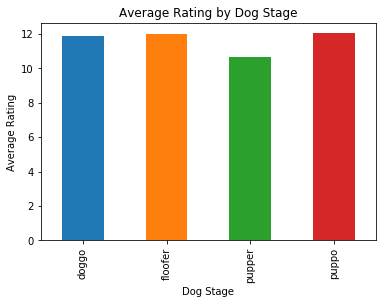

In [119]:
group_rating_mean.plot(kind="bar")
plt.title("Average Rating by Dog Stage")
plt.ylabel("Average Rating")
plt.xlabel("Dog Stage");
#Display summary statistics
pd.DataFrame(group_rating_mean).rename(columns={"rating": "average_rating"})

####  2: Average favorite and retweet counts per dog stage

Plot a bar plot to show the average favorite count and retweet count of tweets per dog stage

,favorite_count,retweet_count
dog_stage,,
doggo,18856.681818,6907.060606
floofer,13245.000000,4812.125000
pupper,7040.402844,2313.829384
puppo,22723.913043,7027.086957


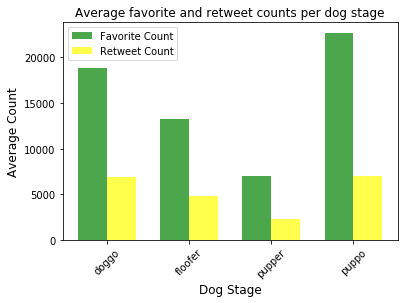

In [120]:
ind = np.arange(len(group_rxn_mean["favorite_count"])) 
width = 0.35
favorite_bars = plt.bar(ind, group_rxn_mean["favorite_count"], width, color='green', alpha=.7);
retweet_bars = plt.bar(ind + width, group_rxn_mean["retweet_count"], width, color='yellow', alpha=.7)
plt.ylabel("Average Count", fontsize=12)
plt.xlabel("Dog Stage", fontsize=12)
plt.title("Average favorite and retweet counts per dog stage")

#set yticks
labels = ["doggo", "floofer", "pupper", "puppo"]
locations = ind + width / 2 
plt.xticks(locations, labels, rotation=45)

#set legend
plt.legend(["Favorite Count", "Retweet Count"]);

#Display summary statistics
group_rxn_mean

#### 3: Top 5 Most Common Breeds that the Model Predicted with the Highest Confidence


Plot a bar plot showing top five most common breed predictions where the model was most confident

,dog_count
golden_retriever,138
labrador_retriever,95
pembroke,88
chihuahua,79
pug,54


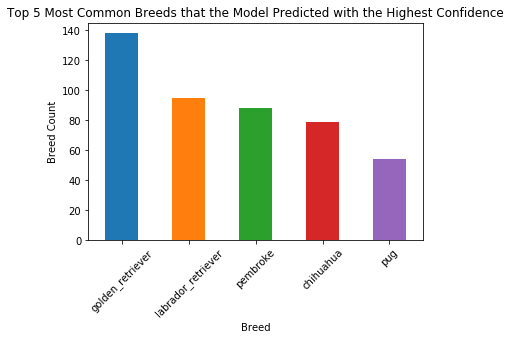

In [121]:
#get the top 5 predictions in the p1 column
top_5 = df[df.p1_dog == True].p1.value_counts()[:5]
#plot bar chart
top_5.plot(kind="bar")
plt.title("Top 5 Most Common Breeds that the Model Predicted with the Highest Confidence")
plt.ylabel("Breed Count")
plt.xlabel("Breed")
plt.xticks(rotation=45);
#Display summary statistics
pd.DataFrame(top_5).rename(columns={"p1": "dog_count"})

#### 4: Proportion of ratings posted from each source

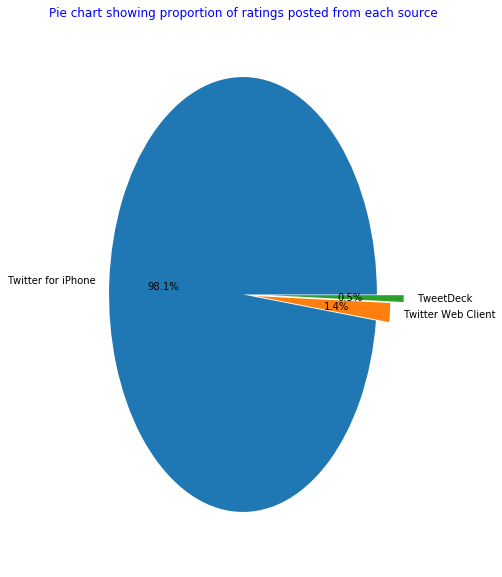

In [162]:
plt.figure(figsize=(6,10))
plt.pie(df["source"].value_counts(), labels=["Twitter for iPhone", "Twitter Web Client", "TweetDeck"], autopct='%1.1f%%', explode=(0, 0.1, 0.2))
plt.title("Pie chart showing proportion of ratings posted from each source", color="blue");


#### 5: Distribution of WeRateDogs Tweets over Time

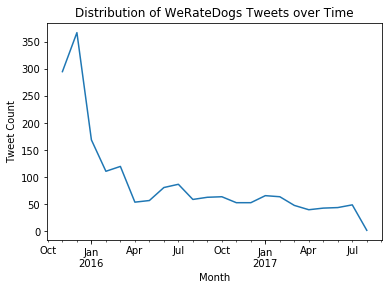

In [161]:
#Plot a line graph to show the distribution of tweet counts over time
month_count.plot(legend=False)
plt.title("Distribution of WeRateDogs Tweets over Time")
plt.xlabel("Month")
plt.ylabel("Tweet Count");



#### 6. Number of Tweets made per Day of Week

,timestamp
Monday,324
Wednesday,297
Tuesday,294
Thursday,284
Friday,283
Sunday,255
Saturday,252


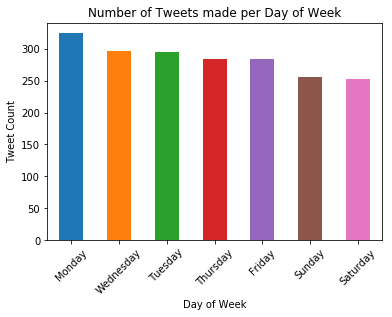

In [123]:
#Plot a bar plot to show the counts of tweets made by day of week
#plot bar chart
day_count.plot(kind="bar")
plt.title("Number of Tweets made per Day of Week")
plt.ylabel("Tweet Count")
plt.xlabel("Day of Week")
plt.xticks(rotation=45);
#Display summary statistics
pd.DataFrame(day_count)#.rename(columns={"timestamp": "day_count"})

### References
 - https://stackoverflow.com/questions/29902714/print-very-long-string-completely-in-pandas-dataframe
 - https://datascientyst.com/extract-month-and-year-datetime-column-in-pandas/
 - https://www.dataquest.io/blog/regex-cheatsheet/